In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import imsave
%matplotlib inline
from scipy.ndimage import filters
from skimage.draw import circle_perimeter

In [16]:
img1 = cv2.imread("house_5.jpg",0)

In [20]:
img2 = cv2.imread("house_6.jpg",0)

In [21]:
img2.shape

(4032, 3024)

In [22]:
img1 = cv2.resize(img1,(4000,3000))

In [23]:
img2 = cv2.resize(img2,(200,300))

In [24]:
def find_corners(img,window_size,ksize,k):
    Ix = cv2.Sobel(img,cv2.CV_64F,1,0,ksize)
    Iy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize)
    Ixx = Ix*Ix
    Iyy = Iy*Iy
    Ixy = np.multiply(Ix,Iy)
    
    Sxx = cv2.GaussianBlur(Ixx,(window_size,window_size),0)
    Syy = cv2.GaussianBlur(Iyy,(window_size,window_size),0)
    Sxy = cv2.GaussianBlur(Ixy,(window_size,window_size),0)
    
    
    height, width = img.shape
    corners=[]
    offset = window_size/2
    
    for i in range(offset, height - offset) :
        for j in range(offset, width - offset) :
            
            sxx = Sxx[i][j]
            syy = Syy[i][j]
            sxy = Sxy[i][j]
            
            det = (sxx * syy) - (sxy ** 2)
            trace = sxx + syy
            r = det - k * (trace ** 2)
            corners.append([i,j,r])
    return corners

In [25]:
corners1 = find_corners(img1,5,3,0.04)

In [13]:
corners1 = np.array(corners1)

In [17]:
def cornercolor(img, corners, thresh, window_size):
    res_img = img.copy()
    res_img = cv2.cvtColor(res_img,cv2.COLOR_GRAY2RGB)
    
    offset = window_size/2
    height, width = img.shape
    
    count = 0;
    no_of_corners = 0
    for i in range(offset, height - offset) :
        for j in range(offset, width - offset) :
            
            if( corners[count][2] > thresh ) :
                no_of_corners = no_of_corners + 1
                rr, cc = circle_perimeter(i, j, 1)
                res_img[rr, cc] = [255,0,0]
            count = count + 1
    return res_img, no_of_corners

In [18]:
result_image_1 ,cornerlist1 = cornercolor(img1,corners1,0.1*max(corners1[:,2]),5)

In [19]:
corners2 = find_corners(img2,5,3,0.04)

In [20]:
corners2 = np.array(corners2)

In [21]:
result_image_2 ,cornerlist2 = cornercolor(img2,corners2,0.1*max(corners2[:,2]),5)

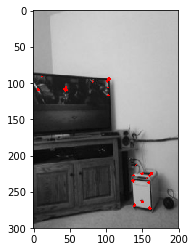

In [22]:
plt.imshow(result_image_1,cmap='gray')

In [24]:
cornerlist2

158